# <span style='color: blue'>               BANK NOTE AUTHENTICATION  </span>

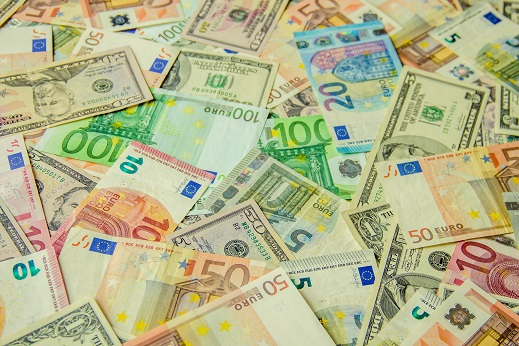

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('data_banknote_authentication.txt',names=['Variance_of_Wavelet_Transformed_Image','Skewness_of_Wavelet_Transformed_Image','Curtosis_of_Wavelet_Transformed_Image','Entropy_of_Image','Class'])
df

,Variance_of_Wavelet_Transformed_Image,Skewness_of_Wavelet_Transformed_Image,Curtosis_of_Wavelet_Transformed_Image,Entropy_of_Image,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Variance_of_Wavelet_Transformed_Image  1372 non-null   float64
 1   Skewness_of_Wavelet_Transformed_Image  1372 non-null   float64
 2   Curtosis_of_Wavelet_Transformed_Image  1372 non-null   float64
 3   Entropy_of_Image                       1372 non-null   float64
 4   Class                                  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.isna().sum()

Variance_of_Wavelet_Transformed_Image    0
Skewness_of_Wavelet_Transformed_Image    0
Curtosis_of_Wavelet_Transformed_Image    0
Entropy_of_Image                         0
Class                                    0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,Variance_of_Wavelet_Transformed_Image,Skewness_of_Wavelet_Transformed_Image,Curtosis_of_Wavelet_Transformed_Image,Entropy_of_Image,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<AxesSubplot:>

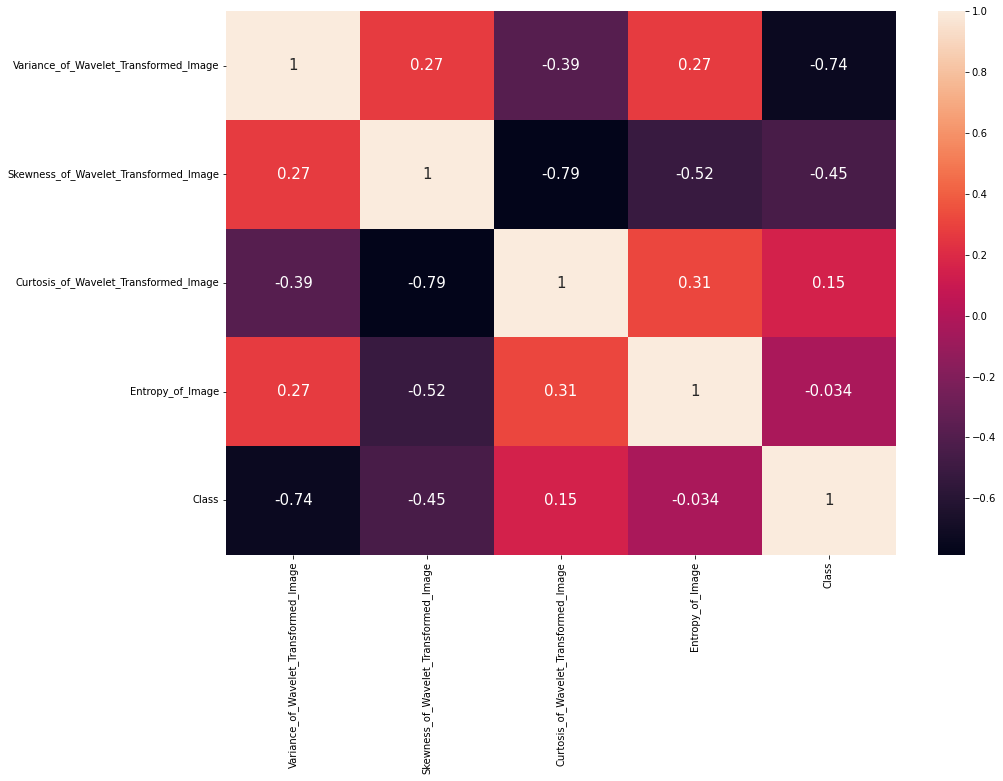

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':15})
#plt.xlabel('xlabel',fontsize=20)

In [9]:
df.shape

(1348, 5)

In [10]:
for i in df.columns:
    print(i,">>>",df[i].nunique())

Variance_of_Wavelet_Transformed_Image >>> 1338
Skewness_of_Wavelet_Transformed_Image >>> 1256
Curtosis_of_Wavelet_Transformed_Image >>> 1270
Entropy_of_Image >>> 1156
Class >>> 2


<Figure size 1800x720 with 0 Axes>

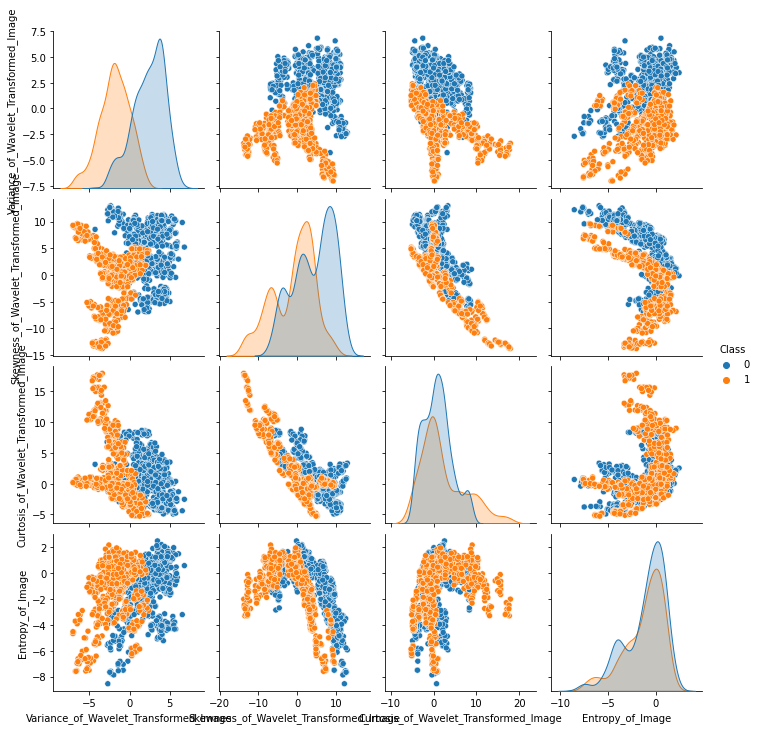

In [11]:
plt.figure(figsize=(25,10))
g=sns.pairplot(df,hue = 'Class')
#for ax in g.axes.flat:
   # plt.setp(ax.get_xticklabels(), rotation=90,ha='right',rotation_mode='anchor')
   # plt.setp(ax.get_yticklabels(), rotation=45)
#g.map(plt.scatter)
#g.tick_params(axis='both', **kwargs)
#g.set_xticklabels(rotaion=45)
#plt.xticks(rotation =45)
#plt.show()


In [12]:
df.columns

Index(['Variance_of_Wavelet_Transformed_Image',
       'Skewness_of_Wavelet_Transformed_Image',
       'Curtosis_of_Wavelet_Transformed_Image', 'Entropy_of_Image', 'Class'],
      dtype='object')

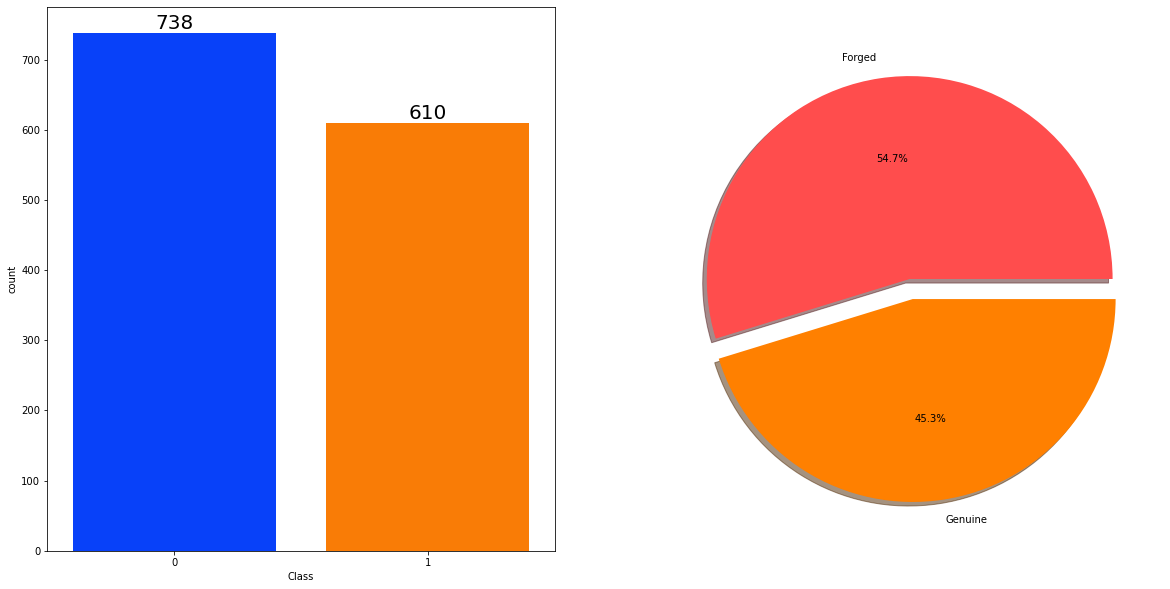

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Class'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Class'].value_counts(),labels=['Forged','Genuine'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## HISTOGRAM AND KDE

In [14]:
def plot_kde(df,Column,hue):
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    plt.subplot(121)
    sns.histplot(data=df,x=Column,bins=30,kde=True,color='g')
    plt.subplot(122)
    sns.histplot(data=df,x=Column,kde=True,hue=hue)
    plt.show()

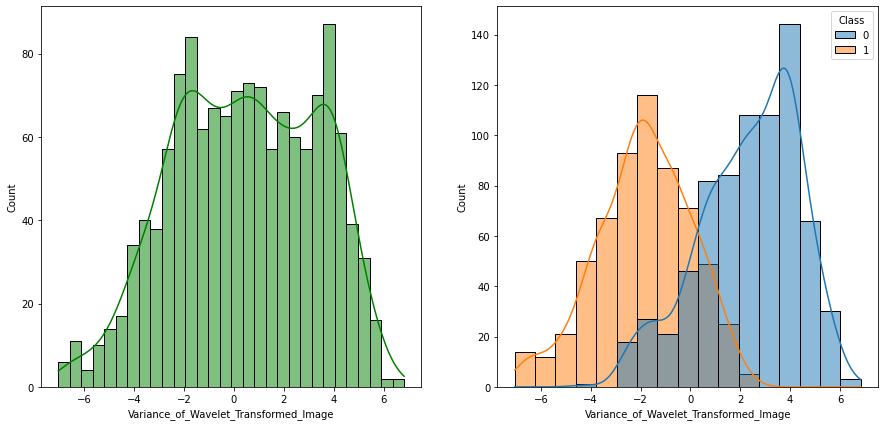

In [15]:
plot_kde(df,'Variance_of_Wavelet_Transformed_Image','Class')

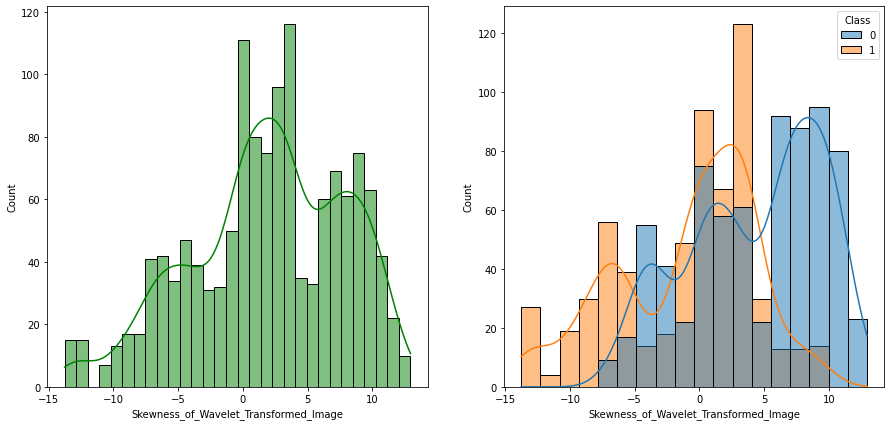

In [16]:
plot_kde(df,'Skewness_of_Wavelet_Transformed_Image','Class')

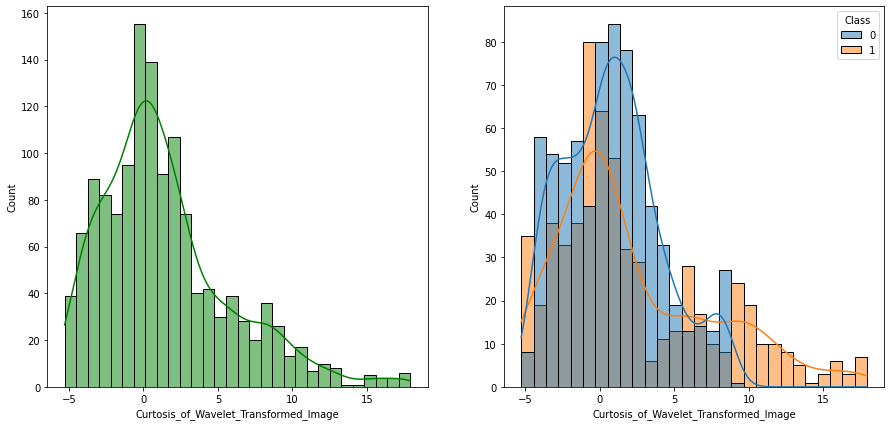

In [17]:
plot_kde(df,'Curtosis_of_Wavelet_Transformed_Image','Class')

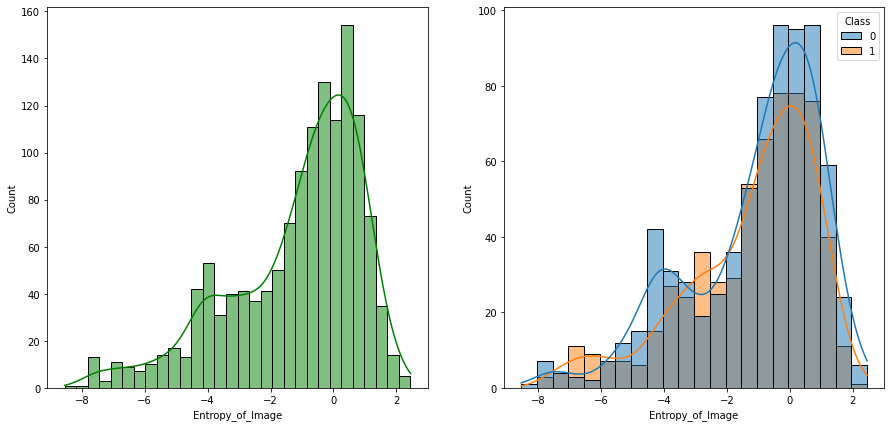

In [18]:
plot_kde(df,'Entropy_of_Image',hue='Class')

In [19]:
num_features=['Variance_of_Wavelet_Transformed_Image',
       'Skewness_of_Wavelet_Transformed_Image',
       'Curtosis_of_Wavelet_Transformed_Image', 'Entropy_of_Image']
num_df=df[num_features]

**3.3  2.2 Shapiro Wick Test**

**The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**

- Ho : Data is normally distributed

- H1 : Data is not normally distributed

In [20]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,Variance_of_Wavelet_Transformed_Image,Not Normally Distributed
1,Skewness_of_Wavelet_Transformed_Image,Not Normally Distributed
2,Curtosis_of_Wavelet_Transformed_Image,Not Normally Distributed
3,Entropy_of_Image,Not Normally Distributed


#### 2.3 K^2 Normality Test
* **Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness**

- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [21]:
from scipy.stats import normaltest
normaltest_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,Variance_of_Wavelet_Transformed_Image,Not Normally Distributed
1,Skewness_of_Wavelet_Transformed_Image,Not Normally Distributed
2,Curtosis_of_Wavelet_Transformed_Image,Not Normally Distributed
3,Entropy_of_Image,Not Normally Distributed


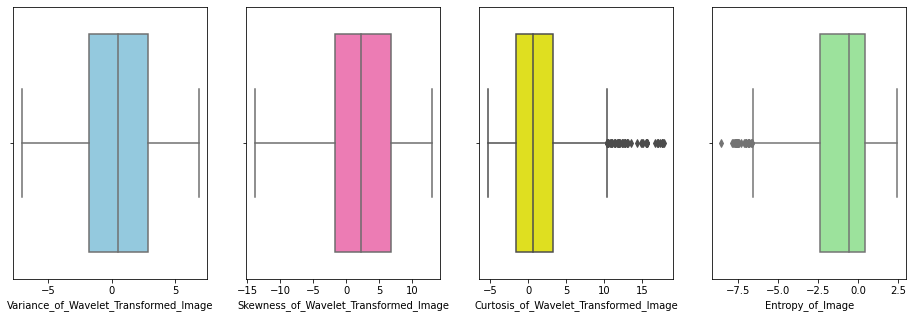

In [22]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data=df,x='Variance_of_Wavelet_Transformed_Image',color='skyblue')
plt.subplot(142)
sns.boxplot(data=df,x='Skewness_of_Wavelet_Transformed_Image',color='hotpink')
plt.subplot(143)
sns.boxplot(data=df,x='Curtosis_of_Wavelet_Transformed_Image',color='yellow')
plt.subplot(144)
sns.boxplot(data=df,x='Entropy_of_Image',color='lightgreen')
plt.show()

In [23]:

def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop('Class',axis = 1)
for i in x.columns:
    
    count_outliers(x,i)
    print("**"*20)

No outliers in Variance_of_Wavelet_Transformed_Image
****************************************
No outliers in Skewness_of_Wavelet_Transformed_Image
****************************************
There are outliers in Curtosis_of_Wavelet_Transformed_Image
Count of outliers are: 60
****************************************
There are outliers in Entropy_of_Image
Count of outliers are: 32
****************************************


In [24]:
X=df.drop('Class',axis=1)
y=df['Class']

In [25]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((1078, 4), (270, 4))

# MODEL BUILDING 

In [26]:

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier


In [27]:
report = []

## <span style='color: green'> Logistic Regression </span>


In [28]:
Logistic_model = LogisticRegression()
Logistic_model.fit(x_train,y_train)


LogisticRegression()

In [29]:
Logistic_model.score(x_test,y_test)

0.9925925925925926

In [30]:
y_pred =Logistic_model.predict(x_test)


In [31]:
## Importing accuracy_score library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score
cof_matrix = confusion_matrix(y_test,y_pred)
print(cof_matrix)

clf_report = classification_report(y_test,y_pred)
print(clf_report)
acc_score = accuracy_score(y_test,y_pred)

report.append(['Logistic Regression',acc_score])
acc_score

[[145   2]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       147
           1       0.98      1.00      0.99       123

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



0.9925925925925926

In [32]:
ytrain_pred = Logistic_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = Logistic_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9998610228026836
RF test roc-auc: 1.0


## <span style='color: green'> KNN CLASSIFIER </span>

In [33]:
KNN_model =KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
y_pred=KNN_model.predict(x_test)

In [34]:
## Importing accuracy_score library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score
cof_matrix = confusion_matrix(y_test,y_pred)
print(cof_matrix)

clf_report = classification_report(y_test,y_pred)
print(clf_report)
acc_score = accuracy_score(y_test,y_pred)

report.append(['KNNClassifier',acc_score])
acc_score

[[146   1]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.99      1.00      1.00       123

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



0.9962962962962963

In [35]:
ytrain_pred = KNN_model.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = KNN_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 1.0


## <span style='color: green'> Decision Tree </span>


In [36]:
## Importing Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [37]:
## fitting of Decision TRee Classifier model for Training dataset
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
## checking Model score for Decision_TRee_Classifier model for Testing dataset
model.score(x_test,y_test)

0.9814814814814815

In [39]:
## Model_Prediction for decision_tree_classifier.
dt_pred = model.predict(x_test)

In [40]:
## Importing accuracy_score library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc
decision_acc = accuracy_score(y_test,dt_pred)
report.append(['Decision Tree',decision_acc])
decision_acc

0.9814814814814815

## <span style='color: green'> Hyperparameter Tunning of decision Tree with GridSearchCV </span>


In [41]:
## Selecting Hyperparameter Tuninng for gridSearchCV
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter':['best','random']
}

In [42]:
dt_grid=GridSearchCV(estimator=model, param_grid= grid_param, cv = 3, n_jobs = -1)

In [43]:
## Fitting decision_tree_classifier Model in training dataset
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [44]:
## choosing best Hyperparameter Tuining for Decision_Tree_Classifier.
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 27,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [45]:
## Applyinng best Hyperparameter for Decision_tree_Classifier
dt_best_para = DecisionTreeClassifier(criterion = "gini",
                                      max_depth= 14 , 
                                      min_samples_leaf= 1,
                                      min_samples_split= 4 ,
                                      splitter= "random")

In [46]:
## Fitting best Hyperparameter for Decision_tree_Classifier
dt_best_para.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14, min_samples_split=4, splitter='random')

In [47]:
## Prediction
dt_best_para_pred2 = dt_best_para.predict(x_test)

In [48]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,dt_pred))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.9814814814814815
Accuracy after Hyper-parameter tunning: 0.9925925925925926


In [49]:
hd_acc = accuracy_score(y_test,dt_best_para_pred2)
report.append(['Decision Tree Hyperparameter tunned',hd_acc])

## <span style='color: green'> Random Forest Classifier </span>


In [50]:
## Importing RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [51]:
## Fitting RandomForestClassifier model in training dataset 
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
## Prediction
y_pred_rf = rf_model.predict(x_test)

In [53]:
# Before Hyper-parameter tunning
rf_acc = accuracy_score(y_test,y_pred_rf)
report.append(['Random Forest',rf_acc])
accuracy_score(y_test,y_pred_rf)

0.9851851851851852

## <span style='color: green'>  Hyperparameter Tunning of Random Forest Classifier with RandomizedSearchCV </span>


In [54]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [55]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [56]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [57]:
random.best_params_,random.best_estimator_

({'n_estimators': 50,
  'min_samples_split': 20,
  'max_features': 'auto',
  'max_depth': None},
 RandomForestClassifier(max_features='auto', min_samples_split=20,
                        n_estimators=50))

In [58]:
random.best_params =  RandomForestClassifier(max_depth= 15, max_features='auto' , min_samples_split=8,
                        n_estimators=100)

In [59]:
random.best_params.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_features='auto', min_samples_split=8)

In [60]:
y_pred_rf_bestpara = random.best_params.predict(x_test)

In [61]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,y_pred_rf))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,y_pred_rf_bestpara))

Accuracy Before Hyper-parameter tunning: 0.9851851851851852
Accuracy after Hyper-parameter tunning: 0.9851851851851852


In [62]:
hd_acc = accuracy_score(y_test,y_pred_rf_bestpara)
report.append(['Random Forest Hypertunned',hd_acc])
accuracy_score(y_test,y_pred_rf_bestpara)

0.9851851851851852

## <span style='color: green'> Bagging Classifier using SVC </span>


In [63]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state=0)

In [64]:
model_bag_svc.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

In [65]:
y_pred_bag = model_bag_svc.predict(x_test)

In [66]:
bg_acc = accuracy_score(y_test, y_pred_bag)
report.append(['Bagging Classifier using SVC',bg_acc])
accuracy_score(y_test, y_pred_bag)

0.9925925925925926

## <span style='color: green'> Voting Classifier </span>


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class= 'multinomial',random_state=1)
clf2 =RandomForestClassifier(n_estimators= 50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators= [('lr',clf1),('rf',clf2),('gnb',clf3)], voting = 'hard', n_jobs=-1)

In [68]:
eclf1.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())],
                 n_jobs=-1)

In [69]:
y_pred_votting = eclf1.predict(x_test)

In [70]:
vc_acc = accuracy_score(y_test,y_pred_votting)
report.append(['Voting Classifier',vc_acc])
accuracy_score(y_test,y_pred_votting)

0.9888888888888889

## <span style='color: green'> Extra Tree Classifier </span>


In [71]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()

In [72]:
et_model.fit(x_train,y_train)

ExtraTreesClassifier()

In [73]:
y_pred_et = et_model.predict(x_test)

In [74]:
et_acc = accuracy_score(y_test,y_pred_et)
report.append(['Extra Trees Classifier', et_acc])
accuracy_score(y_test,y_pred_et)

0.9962962962962963

## <span style='color: green'> Hyperparameter tunning of ET_model by RandomSearchCV </span>


In [75]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [76]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = et_model,
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [77]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [78]:
random.best_params_,random.best_estimator_

({'n_estimators': 100,
  'min_samples_split': 2,
  'max_features': 3,
  'max_depth': None},
 ExtraTreesClassifier(max_features=3))

In [79]:
et_best_para =  ExtraTreesClassifier(max_depth=15, max_features=3 , min_samples_split=2,
                        n_estimators=200)

In [80]:
et_best_para.fit(x_train,y_train)

ExtraTreesClassifier(max_depth=15, max_features=3, n_estimators=200)

In [81]:
y_pred_et = et_best_para.predict(x_test)

In [82]:
et_acc_ht = accuracy_score(y_test,y_pred_et)
report.append(['Extra Tress Classifier Hypertuned', et_acc_ht])
accuracy_score(y_test,y_pred_et)

1.0

In [83]:
## Importing accuracy_score library
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score
cof_matrix = confusion_matrix(y_test,y_pred_et)
print(cof_matrix)

clf_report = classification_report(y_test,y_pred_et)
print(clf_report)

[[147   0]
 [  0 123]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       123

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [84]:
ytrain_pred = et_best_para.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = et_best_para.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 1.0


In [85]:
report

[['Logistic Regression', 0.9925925925925926],
 ['KNNClassifier', 0.9962962962962963],
 ['Decision Tree', 0.9814814814814815],
 ['Decision Tree Hyperparameter tunned', 0.9925925925925926],
 ['Random Forest', 0.9851851851851852],
 ['Random Forest Hypertunned', 0.9851851851851852],
 ['Bagging Classifier using SVC', 0.9925925925925926],
 ['Voting Classifier', 0.9888888888888889],
 ['Extra Trees Classifier', 0.9962962962962963],
 ['Extra Tress Classifier Hypertuned', 1.0]]

In [86]:
i_report = pd.DataFrame(report, columns = ['Classifier','Accuracy'])

In [87]:
i_report.sort_values(by = "Accuracy",ascending = False)

,Classifier,Accuracy
9,Extra Tress Classifier Hypertuned,1.000000
1,KNNClassifier,0.996296
8,Extra Trees Classifier,0.996296
0,Logistic Regression,0.992593
3,Decision Tree Hyperparameter tunned,0.992593
6,Bagging Classifier using SVC,0.992593
7,Voting Classifier,0.988889
4,Random Forest,0.985185
5,Random Forest Hypertunned,0.985185
2,Decision Tree,0.981481


## <span style='color: blue'> Summary </span>

- The Extra Tree Classifier 
- KNN Classfier 

shows the highest accuracy so pickle both 

## <span style='color: green'>  Store the Best model (EXTRA TREE CLASSIFIER) in a pickle file </span>


In [88]:
import pickle
pickle.dump(et_best_para, open('Extra_Tree_classifier.pickle','wb'))

## <span style='color: green'>  Store the Best model (KNN CLASSIFIER) in a pickle file </span>

In [89]:
import pickle
pickle.dump(KNN_model, open('KNN_model.pickle','wb'))

# <span style='color: voilet'> THANK YOU </span>
